# WEB SCRAPING (Trip Advisor)

In [1]:
# %pip install selenium
# %pip install webdriver-manager

In [1]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.support.wait import WebDriverWait
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from datetime import datetime
import time
import csv

import pandas as pd

In [60]:
start_url = "https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html"

In [62]:
# load Edge driver (to control it from python, (!) needed every time) and open the URL a maximised browser window
browser = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))

browser.maximize_window()
browser.get(start_url)

In [ ]:
# wait (3 seconds) for cookies button to appear
cookies_wait = WebDriverWait(browser, timeout=3)

# wait util "accept cookies" button appears, then assign it to the "cookies_accept" variable (b=browser, from "cookies_wait" variable)
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
# show_purposes = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-pc-btn-handler"]'))

cookies_accept.click()
# show_purposes.click()

# reject_all = cookies_wait2.until(lambda b: b.find_element('xpath', '//*[@id="ot-pc-refuse-all-handler"]'))
# reject_all.click()

In [ ]:
# find button to expand all the reviews, then click it
expand = browser.find_element('xpath', './/div[contains(@data-test-target, "expand-review")]')
if expand:
    expand.click()

In [6]:
# # get all reviews in the page
# reviews = browser.find_elements('xpath', './/div[@data-reviewid]')
# type(reviews)

## "get_data" CODE

In [ ]:
with open('ArmaniHotelReview2.csv', 'w', encoding='utf-8', newline='') as csvFile:
    csvWriter = csv.writer(csvFile)
    # csvWriter.writerow(["Rating", "Year", "Month", "Title", "Body"])
    csvWriter.writerow(["Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"])
    try:
        while True:
        # for i in range(10): # first 10 pages

            time.sleep(1)
            # newPage_wait = WebDriverWait(browser, timeout=3)
            # newPage_accept = newPage_wait.until(lambda b: b.find_element('xpath', '//div[class="jVDab o W f u w GOdjs"]'))

            reviews = browser.find_elements('xpath', './/div[@data-reviewid]')

            for r in reviews:
                # find rating
                rating_bubble = r.find_element('xpath', './/span[contains(@class, "ui_bubble_rating bubble_")]')
                rating = rating_bubble.get_attribute('class').split('_')[3][0]

                # find review date ('month year')
                date_obj = r.find_element('xpath', './/span[contains(@class, "teHYY _R Me S4 H3")]')
                date_text = date_obj.text.replace('Date of stay: ', '')
                date = datetime.strptime(date_text, '%B %Y')

                # find review title + body
                title = r.find_element('xpath', './/div[contains(@data-test-target, "review-title")]').text
                body = r.find_element('xpath', './/span[@class="QewHA H4 _a"]').text.replace('\n', ' ')

                # # find address
                # address = r.find_element('xpath', './/span[@class="biGQs _P pZUbB KxBGd"]').text.split('>')[1].split('<')[0]

                # save review data to csv file
                csvWriter.writerow([rating, date.year, date.month, title, body]) # , address
            try:
                browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
            except:
                break
    finally:
        browser.quit()

In [ ]:
# print(len(csvFile))

# SMALL DATA

In [24]:
import pandas as pd
from datatile.summary.df import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
file = 'ArmaniHotelReview.csv'
df = pd.read_csv(file)
df

,Rating,Year,Month,Title,Body
0,5,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,3,2023,7,First class team,The team at the Armani were amongst the best I...
2,5,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,5,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,5,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...
...,...,...,...,...,...
726,3,2012,3,"It's difficult to fall in love with the place,...","As always, I'll the pros and cons. Then a few ..."
727,3,2011,12,Not a cozy place.,Marbles all over. It looks like the Singapore ...
728,5,2011,7,Love! Love! Love!,Loved everything about my experience at this h...
729,2,2012,1,"Design yes, hotel no","Despite its pure lines, the expensive material..."


In [99]:
dfs = DataFrameSummary(df).summary()
dfs

c:\Users\LucaMora\AppData\Local\Programs\Python\Python311\Lib\site-packages\datatile\summary\df.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.corr = df.corr()


,Rating,Year,Month,Title,Body
count,731.0,731.0,731.0,NaN,NaN
mean,4.638851,2016.064295,6.97264,NaN,NaN
std,0.792652,2.381429,3.182885,NaN,NaN
min,1.0,2011.0,1.0,NaN,NaN
25%,5.0,2015.0,4.0,NaN,NaN
50%,5.0,2016.0,7.0,NaN,NaN
75%,5.0,2017.0,10.0,NaN,NaN
max,5.0,2023.0,12.0,NaN,NaN
counts,731,731,731,731,731
uniques,5,13,12,699,731


In [130]:
df["Year-Month"] = df["Year"].astype("string") + '-' + df["Month"].astype("string").str.zfill(2)
df

,Rating,Year,Month,Title,Body,Year-Month
0,5,2023,8,EB,"Everything is fine, except for the cold feel o...",2023-08
1,3,2023,7,First class team,The team at the Armani were amongst the best I...,2023-07
2,5,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...,2023-07
3,5,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...,2023-06
4,5,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...,2023-05
...,...,...,...,...,...,...
726,3,2012,3,"It's difficult to fall in love with the place,...","As always, I'll the pros and cons. Then a few ...",2012-03
727,3,2011,12,Not a cozy place.,Marbles all over. It looks like the Singapore ...,2011-12
728,5,2011,7,Love! Love! Love!,Loved everything about my experience at this h...,2011-07
729,2,2012,1,"Design yes, hotel no","Despite its pure lines, the expensive material...",2012-01


In [121]:
# df["Year-Month"] = df["Year-Month"].astype('category')

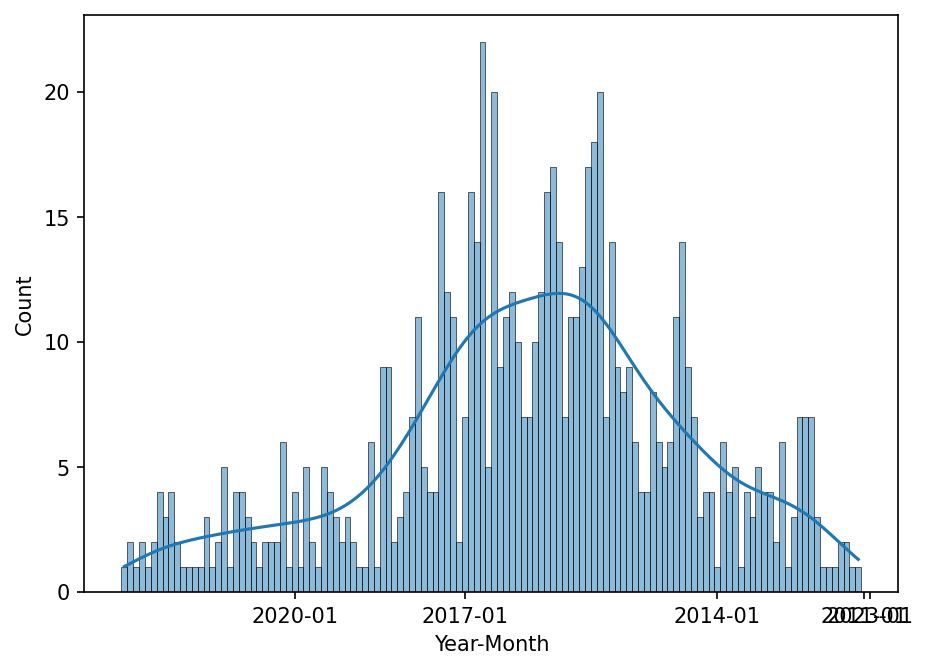

In [236]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)

sns.histplot(data=df, x='Year-Month', kde=True, bins=24)
ax.set_xticks(['2011-01', '2014-01', '2017-01', '2020-01', '2023-01']); # (???)

In [140]:
df2 = df.groupby("Year-Month").mean()
df3= df.groupby("Year-Month").count()
df2["Review Count"] = df3["Rating"]
df2

C:\Users\LucaMora\AppData\Local\Temp\ipykernel_24984\3677292834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby("Year-Month").mean()


,Rating,Year,Month,Review Count
Year-Month,,,,
2011-07,5.0,2011.0,7.0,1
2011-11,3.0,2011.0,11.0,1
2011-12,3.5,2011.0,12.0,2
2012-01,2.0,2012.0,1.0,1
2012-03,2.5,2012.0,3.0,2
...,...,...,...,...
2023-04,4.0,2023.0,4.0,1
2023-05,5.0,2023.0,5.0,2
2023-06,5.0,2023.0,6.0,1


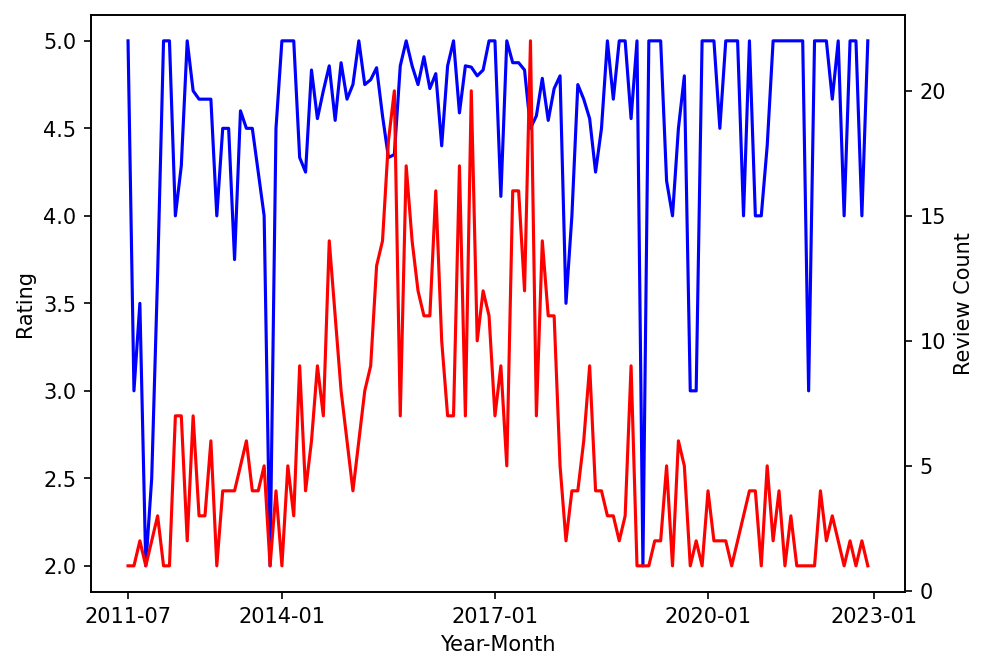

In [281]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)

sns.lineplot(data=df2.Rating, color="b")
ax2 = plt.twinx()
sns.lineplot(data=df2.sort_values(by="Year-Month")["Review Count"], color="r", ax=ax2)

ax.set_xticks(['2011-07', '2014-01', '2017-01', '2020-01', '2023-01']);

0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
1 0


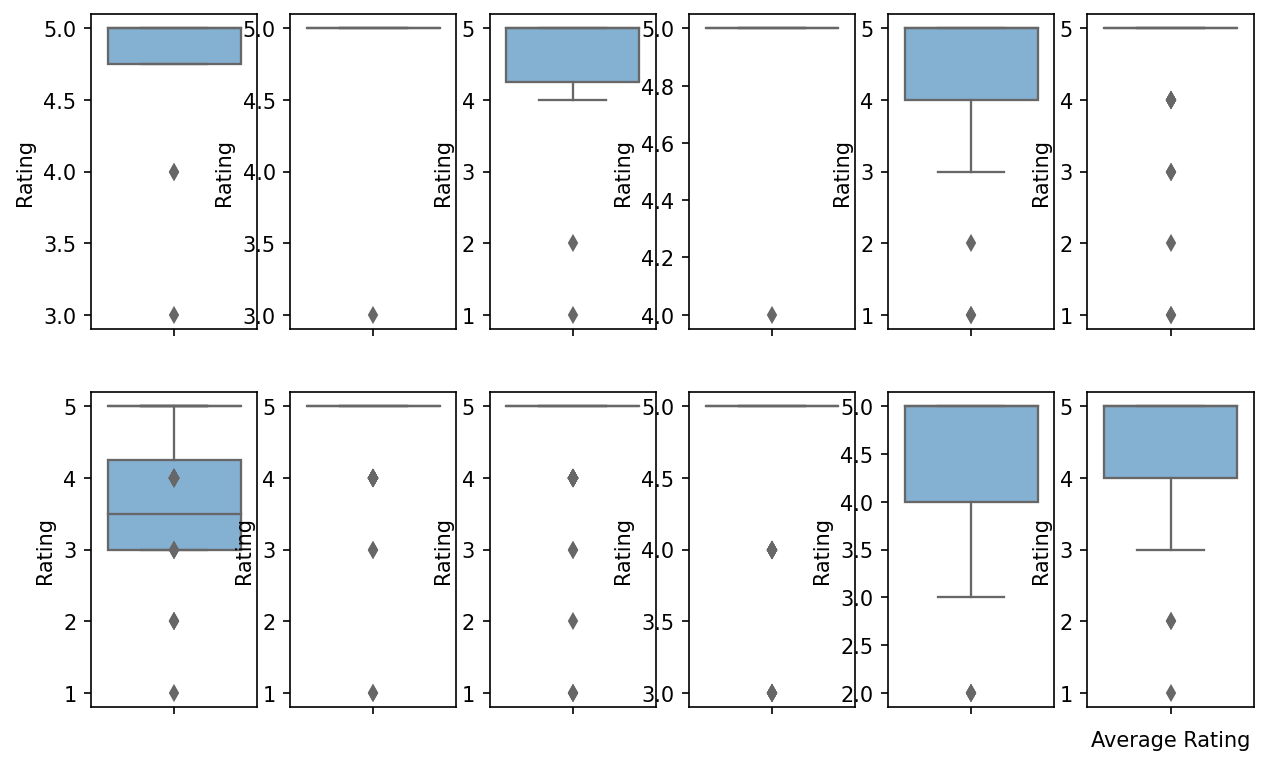

In [205]:
# fig, ax = plt.subplots(figsize=(8,2), dpi=150)
fig, axes = plt.subplots(2, 6, sharex=True, figsize=(10,6), dpi=150)

# sns.boxplot(data=df2, x='Rating', saturation=1, color='#84b0d2', linewidth=1.1)

# ax.axvline(glucose_mean, color='r', linestyle='--', alpha=0.8, label='mean', linewidth=2)

# plt.xlabel('Average Rating')
# plt.xlabel('')
# ax.set(xticklabels=[])

j, i = 0, 0
for year in df["Year"].unique():
    print(i, j)
    sns.boxplot(data = df[df["Year"] == year], y='Rating', saturation=1, color='#84b0d2', linewidth=1.1, orient='v', ax = axes[i][j])
    j += 1
    if j==6:
        j=0
        i=1

# plt.legend()
plt.show()

# WORDCLOUD

In [ ]:
# %pip install wordcloud

In [215]:
from wordcloud import WordCloud, STOPWORDS

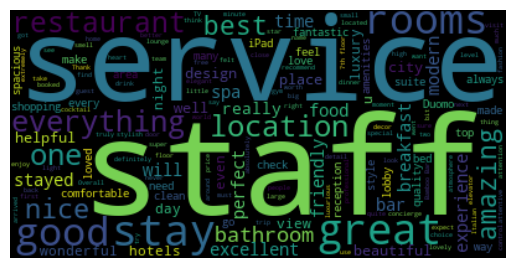

In [228]:
# adding ["armani", "hotel", "milan", "milano", "room"] to the default stopwords (to be ignored)
mystopwords = set(STOPWORDS)
mystopwords.update(["armani", "hotel", "milan", "milano", "room"])

reviews = " ".join(r for r in df.Body)

wordcloud_plot = WordCloud(stopwords=mystopwords).generate(reviews)
plt.imshow(wordcloud_plot, interpolation="bilinear")
plt.axis("off")

plt.show()

In [260]:
# adding a "sentiment" column to the reviews df, based only on the rating (>3 = positive, else negative)

df_sentiment = df
df_sentiment["Sentiment"] = df["Rating"].apply(lambda Rating: 1 if Rating > 3 else -1)

# split the df between positive and negative sentiment
df_positive = df_sentiment[df_sentiment["Sentiment"] == 1]
df_negative = df_sentiment[df_sentiment["Sentiment"] == -1]

# join all the positive & negative review Bodies into one string, to generate the wordcloud with them
reviews_pos = " ".join(r for r in df_positive.Body)
wordcloud_pos = WordCloud(stopwords=mystopwords).generate(reviews_pos)
reviews_neg = " ".join(r for r in df_negative.Body)
wordcloud_neg = WordCloud(stopwords=mystopwords).generate(reviews_neg)


C:\Users\LucaMora\AppData\Local\Temp\ipykernel_24984\2072797534.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


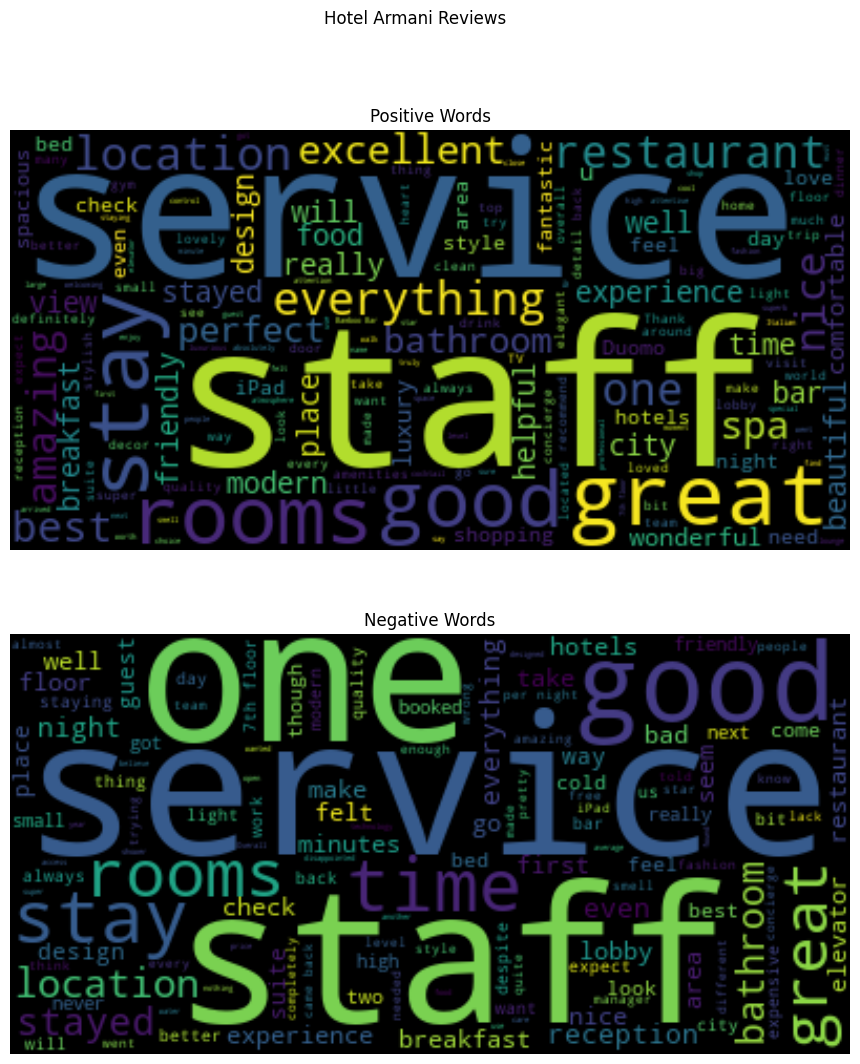

In [261]:
fig, axes = plt.subplots(2, 1, figsize=(12,12))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Positive Words")
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Negative Words")

fig.suptitle("Hotel Armani Reviews")
fig.show()

In [273]:
len(df_negative[df_negative["Body"].str.contains("racist")])

0

In [274]:
len(df_negative[df_negative["Title"].str.contains("racist")])

1

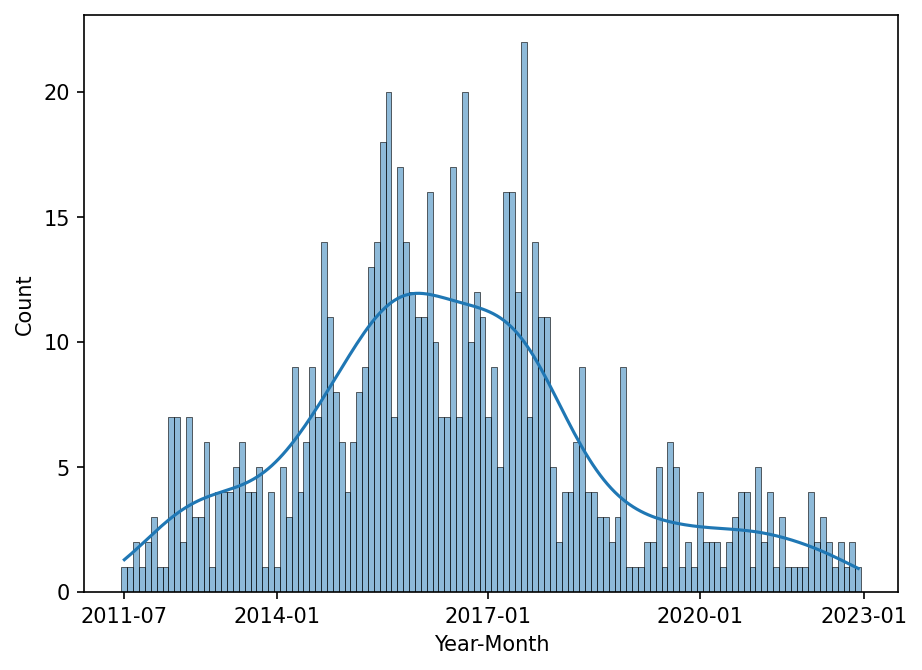

In [278]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)

sns.histplot(data=df.sort_values(by="Year-Month"), x='Year-Month', kde=True, bins=24)
ax.set_xticks(['2011-07', '2014-01', '2017-01', '2020-01', '2023-01']);

# BIG DATA

In [7]:
start_url_2 = "https://www.tripadvisor.com/Hotels-g187849-Milan_Lombardy-Hotels.html"

In [8]:
browser2 = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser2.maximize_window()
browser2.get(start_url_2)

In [9]:
cookies_wait = WebDriverWait(browser2, timeout=3)
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

In [10]:
see_all = browser2.find_element('xpath', './/button[@class="rmyCe _G B- z _S c Wc wSSLS pexOo sOtnj"]')
see_all.click()

# try:
#     browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
# except:
#     break

## get_listing_data FUNCTION

In [6]:
def get_listing_data(listing_url: str) -> list:
    try:
        while True:
        # for i in range(10): # first 10 pages

            time.sleep(1)
            # newPage_wait = WebDriverWait(browser2, timeout=3)
            # newPage_accept = newPage_wait.until(lambda b: b.find_element('xpath', '//div[class="jVDab o W f u w GOdjs"]'))
            
            browser2.get(listing_url)
            reviews = browser2.find_elements('xpath', './/div[@data-reviewid]')

            reviews_data = []

            for r in reviews:
                # find rating
                rating_bubble = r.find_element('xpath', './/span[contains(@class, "ui_bubble_rating bubble_")]')
                rating = rating_bubble.get_attribute('class').split('_')[3][0]

                # find review date ('month year')
                date_obj = r.find_element('xpath', './/span[contains(@class, "teHYY _R Me S4 H3")]')
                date_text = date_obj.text.replace('Date of stay: ', '')
                date = datetime.strptime(date_text, '%B %Y')

                # find review title + body
                title = r.find_element('xpath', './/div[contains(@data-test-target, "review-title")]').text
                body = r.find_element('xpath', './/span[@class="QewHA H4 _a"]').text.replace('\n', ' ')

                # # find address
                # address = r.find_element('xpath', './/span[@class="biGQs _P pZUbB KxBGd"]').text.split('>')[1].split('<')[0]

                reviews_data.append([rating, date.year, date.month, title, body]) # , address
            try:
                browser2.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
            except:
                break
    finally:
        browser2.quit()
        return reviews_data

In [ ]:
reviews_data = get_listing_data("https://www.tripadvisor.com/Hotel_Review-g187849-d229090-Reviews-Hotel_Berna-Milan_Lombardy.html")
reviews_data

In [10]:
start_url_2 = "https://www.tripadvisor.com/Hotels-g187849-Milan_Lombardy-Hotels.html"

browser2 = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser2.maximize_window()
browser2.get(start_url_2)

In [3]:
cookies_wait = WebDriverWait(browser2, timeout=3)
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

In [4]:
see_all = browser2.find_element('xpath', './/button[@class="rmyCe _G B- z _S c Wc wSSLS pexOo sOtnj"]')
see_all.click()

In [ ]:
try:
    while True:
        
        # start_url_2 = "https://www.tripadvisor.com/Hotels-g187849-Milan_Lombardy-Hotels.html"

        # browser2 = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
        # browser2.maximize_window()
        # browser2.get(start_url_2)

        # try:
        #     cookies_wait = WebDriverWait(browser2, timeout=3)
        #     cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
        #     cookies_accept.click()
        # finally:

        # try:
        #     see_all = browser2.find_element('xpath', './/button[@class="rmyCe _G B- z _S c Wc wSSLS pexOo sOtnj"]')
        #     see_all.click()
        # finally:


        df = pd.DataFrame(columns=["Listing_Title", "URL", "Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"])


        # CHROME
        # listings = browser2.find_elements('xpath', './/span[@class="listItem"]')

        # EDGE
        listings = browser2.find_elements('xpath', './/div[@class="yJIls z y M0"]')


        for l in listings:

            # # CHROME
            # # find listing title
            # listing_title = l.find_element('xpath', './/div[@class="nBrpc Wd o W"]').text.strip().split('.')[1]

            # # find listing URL to pass to get_lsiting_data() function, and add to "URL" column
            # listing_url = l.find_element('xpath', './/a[@class="BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS"]').get_property("href")


            # EDGE
            # find listing title
            # listing_title = l.find_element('xpath', './/a[@class="property_title prominent "]').text.strip().split('.')[1]
            listing_title = l.find_element('xpath', './/div[@class="nBrpc Wd o W"]').text.split('.')[1].strip()

            # find listing URL to pass to get_lsiting_data() function, and add to "URL" column
            listing_url = l.find_element('xpath', './/a[@class="BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS"]').get_property("href")
            print(listing_url)


            # rev_rating, rev_year, rev_month, rev_title, rev_body 
            reviews_data = get_listing_data(listing_url)

            time.sleep(2)

            listing_df = pd.DataFrame(reviews_data, columns=["Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"])
            
            listing_df["Listing_Title"] = listing_title
            listing_df["URL"] = listing_url

            # add data from listing_df to df
            pd.concat([df, listing_df])
        try:
            browser2.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
        except:
            break
    # save listing data to csv file
    # csvWriter.writerow([listing_title, listing_url, rev_rating, rev_year, rev_month, rev_title, rev_body]) # , address
    df.to_csv('Milan_Hotels.csv', index=False)
finally:
    browser2.quit()

In [ ]:
# USE THIS AFTER CODE ABOVE WORKS (? outdated)
# with open('Milan_Hotels.csv', 'w', encoding='utf-8', newline='') as csvFile:
#     try:
#         csvWriter = csv.writer(csvFile)
#         csvWriter.writerow(["Listing_Title", "URL", "Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"]) # , "Listing_Address"

#         for l in listings:
#             # find listing title + body
#             listing_title = l.find_element('xpath', './/div[@class="nBrpc Wd o W"]').text.strip().split('.')[1]
            
#             # find listing URL to pass to get_lsiting_data() function, and add to "URL" column
#             listing_url = l.find_element('xpath', './/a[@class="BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS"]').get_property("href")
#             # BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS
#             # jsTLT K

#             # rev_rating, rev_year, rev_month, rev_title, rev_body 
#             reviews_data = get_listing_data(listing_url)
#             df = pd.DataFrame(reviews_data, columns=["Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"])
            
#             df["Listing_Title"] = listing_title
#             df["URL"] = listing_url

#             # save listing data to csv file
#             # csvWriter.writerow([listing_title, listing_url, rev_rating, rev_year, rev_month, rev_title, rev_body]) # , address
#             df.to_csv('Milan_Hotels.csv', index=False)

#     finally:
#         browser2.quit()

## TESTS

In [40]:
listings = browser2.find_elements('xpath', './/span[@class="listItem"]')
urls, listing_titles = [], []

for l in listings:
    # find listing title + body
    listing_title = l.find_element('xpath', './/div[@class="nBrpc Wd o W"]').text.split('.')[1].strip()
    
    listing_url = l.find_element('xpath', './/a[@class="BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS"]').get_property("href")

    urls.append(listing_url)
    listing_titles.append(listing_title)
    # print(listing_title)
    # print(url)
    # print("")

listing_titles

['Hotel Berna',
 'Duo Milan Porta Nuova, a Tribute Portfolio Hotel',
 'Hotel Spadari Al Duomo',
 'Klima Hotel Milano Fiere',
 'Lancaster Hotel',
 'NH Collection Milano President',
 'B&B Hotel Milano City Center Duomo',
 'NYX Hotel Milan',
 'Château Monfort',
 'c-Hotel Rubens',
 'Hotel Bernina',
 'B&B Hotel Milano Ornato',
 'iQ Hotel Milano',
 'Duomo Hotel & Apartments Milano',
 'Hotel The Square Milano Duomo',
 'Crowne Plaza Milan City, an IHG hotel',
 'Ostello Bello Grande - Milano Centrale',
 'c-hotels Atlantic',
 'Grand Visconti Palace',
 'Hotel Da Vinci',
 'Glam Hotel',
 'Rosa Grand Milano - Starhotels Collezione',
 'Eco Hotel Milano',
 '43 Station Hotel',
 'Hotel Sanpi Milano',
 'ibis Milano Centro',
 'Hotel degli Arcimboldi',
 'Andreola Hotel',
 'Hotel Eurohotel Milano',
 'J24 Hotel Milano']

In [77]:
reviews_data

[['5',
  2018,
  12,
  'Armani milano',
  'Amazing property. Fantastic staff and crew. Luxurious and beautiful . Wonderful lounge and bar and restaurant. Must visit. Excellent location. Close to attractions and high end shopping. Looking forward to my next visit.'],
 ['5',
  2018,
  12,
  'Outstanding hotel',
  'This was a treat for our anniversary. I asked for a car to pick us up form the airport. All done / very easy. I asked for a top floor room. All done and had a free upgrade to a premier room (I didn’t ask for one so that was a nice touch). We ate in the bamboo bar and Michelin star restaurant. Both excellent. All staff flawless. This is a genuine five star hotel.'],
 ['4',
  2018,
  5,
  'Modern, elegant, but overpriced',
  "Armani Hotel is modern, slick, prestigious and in a perfect location, but it's clearly overpriced and leaves you with some bitter when you expect a perfect hotel service. Perfect to hang out, but to stay in central Milan you got better alternatives for much 

In [82]:
df = pd.DataFrame(reviews_data, columns=["Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"])

df["Listing_Title"] = listing_title
df["URL"] = listing_url

df

,Review_Rating,Review_Year,Review_Month,Review_Title,Review_Body,Listing_Title,URL
0,5,2018,12,Armani milano,Amazing property. Fantastic staff and crew. Lu...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
1,5,2018,12,Outstanding hotel,This was a treat for our anniversary. I asked ...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
2,4,2018,5,"Modern, elegant, but overpriced","Armani Hotel is modern, slick, prestigious and...",Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
3,1,2018,12,Kinda Terrible Movie Stage !!!,have had my very positive and luxurious dreams...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
4,5,2018,11,Stylish with amazing ambiance,We had an amazing stay at Armani. It is such a...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
5,5,2018,11,Modern Excellence,Some serious thought went into planning this h...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
6,5,2018,10,Stylish hotel,The hotel stay was 5 star from reception to de...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
7,5,2018,9,Favourite Hotel in Milan,Great personnel. Great services. Good restaura...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
8,5,2018,10,Excellent hotel I’m trendy Milan,I thoroughly enjoyed my stay at this very tren...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...
9,4,2018,9,"Chic Italian Sophistication, by Armani",This is the third hotel I have stayed in Milan...,Hotel Berna,https://www.tripadvisor.com/Hotel_Review-g1878...


In [ ]:
listings = browser2.find_elements('xpath', './/span[@class="listItem"]')
listings

In [22]:
reviews_data

NameError: name 'reviews_data' is not defined

### CHAT GPT HELP

In [ ]:
i have this code:

start_url_2 = "https://www.tripadvisor.com/Hotels-g187849-Milan_Lombardy-Hotels.html"

browser2 = webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser2.maximize_window()
browser2.get(start_url_2)

cookies_wait = WebDriverWait(browser2, timeout=3)
cookies_accept = cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

def get_listing_data(listing_url: str) -> list:
    try:
        while True:
        # for i in range(10): # first 10 pages

            time.sleep(1)
            # newPage_wait = WebDriverWait(browser2, timeout=3)
            # newPage_accept = newPage_wait.until(lambda b: b.find_element('xpath', '//div[class="jVDab o W f u w GOdjs"]'))
            
            browser2.get(listing_url)
            reviews = browser2.find_elements('xpath', './/div[@data-reviewid]')

            reviews_data = []

            for r in reviews:
                # find rating
                rating_bubble = r.find_element('xpath', './/span[contains(@class, "ui_bubble_rating bubble_")]')
                rating = rating_bubble.get_attribute('class').split('_')[3][0]

                # find review date ('month year')
                date_obj = r.find_element('xpath', './/span[contains(@class, "teHYY _R Me S4 H3")]')
                date_text = date_obj.text.replace('Date of stay: ', '')
                date = datetime.strptime(date_text, '%B %Y')

                # find review title + body
                title = r.find_element('xpath', './/div[contains(@data-test-target, "review-title")]').text
                body = r.find_element('xpath', './/span[@class="QewHA H4 _a"]').text.replace('\n', ' ')

                # # find address
                # address = r.find_element('xpath', './/span[@class="biGQs _P pZUbB KxBGd"]').text.split('>')[1].split('<')[0]

                reviews_data.append([rating, date.year, date.month, title, body]) # , address
            try:
                browser2.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
            except:
                break
    finally:
        browser2.quit()
        return reviews_data

try:
    see_all = browser2.find_element('xpath', './/button[@class="rmyCe _G B- z _S c Wc wSSLS pexOo sOtnj"]')
    see_all.click()
finally:
    listings = browser2.find_elements('xpath', './/span[@class="listItem"]')

    for l in listings:
        # find listing title + body
        listing_title = l.find_element('xpath', './/div[@class="nBrpc Wd o W"]').text.strip().split('.')[1]
        
        # find listing URL to pass to get_lsiting_data() function, and add to "URL" column
        listing_url = l.find_element('xpath', './/a[@class="BMQDV _F Gv wSSLS SwZTJ FGwzt ukgoS"]').get_property("href")

        # rev_rating, rev_year, rev_month, rev_title, rev_body 
        reviews_data = get_listing_data(listing_url)
        df = pd.DataFrame(reviews_data, columns=["Review_Rating", "Review_Year", "Review_Month", "Review_Title", "Review_Body"])
        
        df["Listing_Title"] = listing_title
        df["URL"] = listing_url

        # save listing data to csv file
        df.to_csv('Milan_Hotels.csv', index=False)

and i'm getting this error:

"name": "MaxRetryError",
	"message": "HTTPConnectionPool(host='localhost', port=3579): Max retries exceeded with url: /session/553a81b0ae2f5c0176c825089081fdf1/element/2434FE802A4C825FC9B0E10BDB4E3BA8_element_97/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000176D36B7990>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))"

how can i fix it?